# 

In [1]:
import os
import pandas as pd
import numpy as np
import phate
import scprep
import seaborn as sns


In [2]:
FILEPATHBASE = '/Users/labshare/Workspace/Aqueous/'

SAVEFIGS = True
if SAVEFIGS:
    IMGDIR = os.path.join(FILEPATHBASE,'img/')

In [3]:
# Load Data

A22_340 = scprep.io.load_10X(os.path.join(FILEPATHBASE, 'data', 'A22_340', 'filtered_feature_bc_matrix'))
A23_019 = scprep.io.load_10X(os.path.join(FILEPATHBASE, 'data', 'A23_019', 'filtered_feature_bc_matrix'))
A23_020 = scprep.io.load_10X(os.path.join(FILEPATHBASE, 'data', 'A23_020', 'filtered_feature_bc_matrix'))
A23_055 = scprep.io.load_10X(os.path.join(FILEPATHBASE, 'data', 'A23_055', 'filtered_feature_bc_matrix'))

/Users/labshare/.local/lib/python3.8/site-packages/scprep/io/tenx.py:38: RuntimeWarning: Duplicate gene names detected! Forcing `gene_labels='both'`. Alternatively, try `gene_labels='id'`, `allow_duplicates=True`, or load the matrix with `sparse=False`
  warnings.warn(
/Users/labshare/.local/lib/python3.8/site-packages/scprep/io/tenx.py:38: RuntimeWarning: Duplicate gene names detected! Forcing `gene_labels='both'`. Alternatively, try `gene_labels='id'`, `allow_duplicates=True`, or load the matrix with `sparse=False`
  warnings.warn(
/Users/labshare/.local/lib/python3.8/site-packages/scprep/io/tenx.py:38: RuntimeWarning: Duplicate gene names detected! Forcing `gene_labels='both'`. Alternatively, try `gene_labels='id'`, `allow_duplicates=True`, or load the matrix with `sparse=False`
  warnings.warn(
/Users/labshare/.local/lib/python3.8/site-packages/scprep/io/tenx.py:38: RuntimeWarning: Duplicate gene names detected! Forcing `gene_labels='both'`. Alternatively, try `gene_labels='id'`, `

In [4]:
SampleList = [A22_340, A23_019, A23_020, A23_055]
SampleLabels = ["A22_340", "A23_019", "A23_020", "A23_055"]

In [13]:
filtered_batches = []
for batch in SampleList:
    batch = scprep.filter.filter_library_size(batch, percentile=5, keep_cells='above')
    batch = scprep.filter.filter_library_size(batch, percentile=95, keep_cells='below')
    filtered_batches.append(batch)

In [14]:
Aq_counts, sample_labels = scprep.utils.combine_batches(
    filtered_batches, 
    SampleLabels,
    append_to_cell_names=True
)
del filtered_batches # removes objects from memory


In [15]:
#Filtering

Aq_counts = scprep.filter.filter_rare_genes(Aq_counts, min_cells=10)

Aq_counts, sample_labels = scprep.filter.filter_library_size(Aq_counts, sample_labels, cutoff=100, keep_cells='above')
Aq_counts, sample_labels = scprep.filter.filter_library_size(Aq_counts,  sample_labels, cutoff=70000, keep_cells='below')

Aq_counts = scprep.normalize.library_size_normalize(Aq_counts)

mito_genes = scprep.select.get_gene_set(Aq_counts, starts_with="MT-") # Get all mitochondrial genes
Aq_counts, sample_labels = scprep.filter.filter_gene_set_expression(
    Aq_counts, sample_labels, genes=mito_genes, 
    percentile=95, keep_cells='below')

Aq_counts = scprep.transform.sqrt(Aq_counts)

In [8]:
Aq_counts

,A1BG (ENSG00000121410),A2M (ENSG00000175899),A2M-AS1 (ENSG00000245105),AAAS (ENSG00000094914),AACS (ENSG00000081760),AAED1 (ENSG00000158122),AAGAB (ENSG00000103591),AAK1 (ENSG00000115977),AAMDC (ENSG00000087884),AAMP (ENSG00000127837),...,ZSWIM5 (ENSG00000162415),ZSWIM6 (ENSG00000130449),ZSWIM7 (ENSG00000214941),ZSWIM8 (ENSG00000214655),ZUP1 (ENSG00000153975),ZWILCH (ENSG00000174442),ZXDC (ENSG00000070476),ZYG11B (ENSG00000162378),ZYX (ENSG00000159840),ZZEF1 (ENSG00000074755)
AAAGAACAGCGTCGAA-1_A22_340,0.684182,2.736727,0.0,0.684182,0.0,0.000000,0.0,0.684182,0.0,0.000000,...,0.0,12.315271,0.000000,0.0,0.0,0.0,2.052545,0.684182,1.368363,0.684182
AAAGGATAGAGGGTGG-1_A22_340,0.000000,19.151444,0.0,0.000000,0.0,0.000000,0.0,2.946376,0.0,0.000000,...,0.0,4.419564,0.000000,0.0,0.0,0.0,0.000000,1.473188,2.946376,0.000000
AAATGGATCCGTGTCT-1_A22_340,0.000000,1.983733,0.0,0.000000,0.0,1.983733,0.0,3.967467,0.0,1.983733,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.983733,0.000000,0.000000,1.983733
AACCCAACAATGCAGG-1_A22_340,0.000000,0.000000,0.0,0.000000,0.0,1.241003,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.241003,0.000000,1.241003,2.482005
AACGTCAAGGACTATA-1_A22_340,0.000000,0.000000,0.0,0.000000,0.0,0.938262,0.0,4.691312,0.0,0.000000,...,0.0,5.629574,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.938262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGGGAAGGTAAATACG-1_A23_020,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,4.074150,2.037075,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
TTAACTCGTGCTAGCC-1_A23_020,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,5.813953,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
TTAACTCTCTCACATT-1_A23_020,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,2.300437,0.000000,0.000000,0.000000
TTCTCAAGTTAGATGA-1_A23_020,0.000000,2.482005,0.0,0.000000,0.0,0.000000,0.0,2.482005,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.482005,0.000000


In [17]:
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate = phate_operator.fit_transform(Aq_counts)

clusters = phate.cluster.kmeans(phate_operator, k=5)

Calculating PHATE...
  Running PHATE on 284 observations and 11533 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.66 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 1.00 seconds.
  Calculating optimal t...
    Automatically selected t = 30
  Calculated optimal t in 0.08 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.27 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.29 seconds.
Calculated PHATE in 2.67 seconds.


/Users/labshare/.local/lib/python3.8/site-packages/phate/cluster.py:57: FutureWarning: k is deprecated. Please use n_clusters in future.
  warnings.warn(
/Users/labshare/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: title={'center': 'PHATE clusters'}, xlabel='PHATE1', ylabel='PHATE2'>

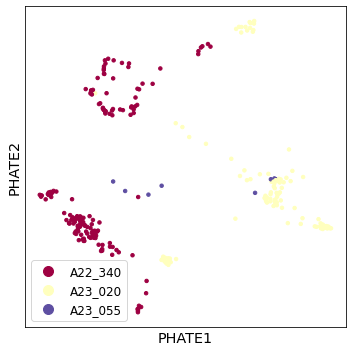

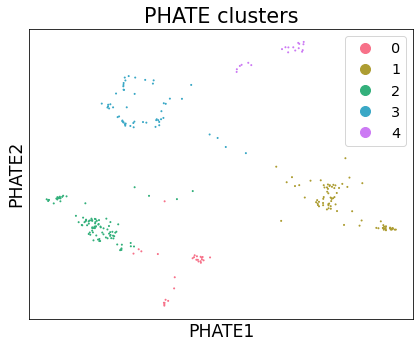

In [18]:
scprep.plot.scatter2d(Y_phate, c=sample_labels, figsize=(5,5), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

scprep.plot.scatter2d(Y_phate, c=clusters, cmap=sns.husl_palette(5), s=1,
                      figsize=(6,5), ticks=None, label_prefix='PHATE',
                     legend_anchor=(1,1), fontsize=12, title='PHATE clusters')
